### Imprting Libraries

In [1]:
import torch
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
# from torch.utils.tensorboard import SummaryWriter
import warnings

warnings.simplefilter("ignore")

### Transforming images
Changing them to Tensors, performing centercrop, also to augment the image, adding random horizental flips, at small angle of rotation.

In [4]:
train_transform = transforms.Compose([
    transforms.Resize((224,224)),
#     transforms.RandomResizedCrop(size=(256,256)),
    transforms.RandomRotation(7.5),
    transforms.RandomHorizontalFlip(),
#     transforms.CenterCrop(size = 224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                        [0.229, 0.224, 0.225])

])

test_transform = transforms.Compose([
        transforms.Resize((224,224)),
#         transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

# test_transform = transforms.Compose([
#         transforms.Resize(256),
#         transforms.CenterCrop(size=224),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406],
#                              [0.229, 0.224, 0.225])
#     ])

### Loading the data

In [3]:
# prompt: import zip folder form drive

from google.colab import drive
drive.mount('/content/drive')
!unzip "/content/drive/My Drive/archive.zip" -d "/content/data"


Streaming output truncated to the last 5000 lines.
  inflating: /content/data/seg_train/seg_train/mountain/7506.jpg  
  inflating: /content/data/seg_train/seg_train/mountain/7537.jpg  
  inflating: /content/data/seg_train/seg_train/mountain/7539.jpg  
  inflating: /content/data/seg_train/seg_train/mountain/7551.jpg  
  inflating: /content/data/seg_train/seg_train/mountain/7560.jpg  
  inflating: /content/data/seg_train/seg_train/mountain/7565.jpg  
  inflating: /content/data/seg_train/seg_train/mountain/7578.jpg  
  inflating: /content/data/seg_train/seg_train/mountain/7581.jpg  
  inflating: /content/data/seg_train/seg_train/mountain/7586.jpg  
  inflating: /content/data/seg_train/seg_train/mountain/7647.jpg  
  inflating: /content/data/seg_train/seg_train/mountain/7652.jpg  
  inflating: /content/data/seg_train/seg_train/mountain/7654.jpg  
  inflating: /content/data/seg_train/seg_train/mountain/7662.jpg  
  inflating: /content/data/seg_train/seg_train/mountain/767.jpg  
  inflating:

In [6]:
#Data Loading
train_dir = './archive/seg_train/seg_train'
test_dir = './archive/seg_test/seg_test'

bs = 50

# num_classes = 2

train_data = datasets.ImageFolder(root=train_dir, transform=train_transform)
test_data = datasets.ImageFolder(root=test_dir, transform=test_transform)

print(len(train_data),len(test_data))


train_data_loader = DataLoader(train_data,batch_size=bs,shuffle=True)
test_data_loader = DataLoader(test_data,batch_size=bs, shuffle=False)

14034 3000


In [7]:
# To know the classes presents
train_data_loader.dataset.classes

#Loading pretrained model
resnet50 = models.resnet50(pretrained=True)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/sidharth/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100.0%


In [10]:
print(resnet50)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
from torch import nn, optim

[link text](https://)### Making all layers trainable, changing last few layers of the model

In [12]:
for param in resnet50.parameters():
    param.require_grad = True

In [13]:
resnet50.fc = nn.Sequential(
    nn.Linear(2048,256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128, 6),
    nn.LogSoftmax(dim=1)

)

In [14]:
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
model = resnet50
print(device)

cpu


In [15]:
model = model.to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [12]:
!cp "/content/drive/MyDrive/iter_24.pth" "/content"

In [ ]:
# writer = SummaryWriter()

### Training the model for 50 epochs, loss function is Cross entropy with adam optimizer

In [16]:

epochs = 30
training_loss = []
testing_loss = []
accuracy_list = []
for epoch in range(epochs):
    print("Epoch: {}/{}".format(epoch+1,epochs))
    model.train()

    train_loss = 0.0
    test_loss = 0.0
    test_acc = 0.0



    for i , (inputs,labels) in enumerate(train_data_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        output = model(inputs)
        loss = loss_func(output,labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()*inputs.size(0)
#         writer.add_scalar('loss', loss, epoch)
        print("Batch number: {:03d}, Training_Loss: {:.4f},".format(i, loss.item()))


    with torch.no_grad():
        model.eval()
        num_correct = 0
        num_examples = 0


        for j , (inputs, target) in enumerate(test_data_loader):
            inputs = inputs.to(device)
            target = target.to(device)

            output = model(inputs)
            loss = loss_func(output, target)
            correct = torch.eq(torch.max(torch.functional.F.softmax(output), dim=1)[1], target).view(-1)
            num_correct += torch.sum(correct).item()
            num_examples += correct.shape[0]
            test_loss += loss.item()*inputs.size(0)
            print("Test Batch number: {:03d}, Test_Loss: {:.4f}, Accuracy:{:.2f}".format(j, loss.item(),num_correct/num_examples))
#             writer.add_scalar('accuracy', num_correct / num_examples, epoch)
#             writer.add_scalar('Test_loss', loss, epoch)
#             test_acc += num_correct





    avg_train_loss = train_loss/len(train_data)
    avg_test_loss = test_loss/len(test_data)
    avg_acc = num_correct/len(test_data)
    training_loss.append(avg_train_loss)
    testing_loss.append(avg_test_loss)
    accuracy_list.append(avg_acc)
    if avg_train_loss<0.12 and avg_acc >.85:
        torch.save(model,'./iterdrop'+str(epoch)+'.pth')
#     if avg_test_loss == avg_train_loss:
#         break



Epoch: 1/30
Batch number: 000, Training_Loss: 1.7876,


KeyboardInterrupt: 

In [13]:
min(training_loss)

0.14019656821329385

In [14]:
training_loss.index(min(training_loss))

29

### Ploting the results
Note: if you have change the number of epochs during training, change range of x axis here too.

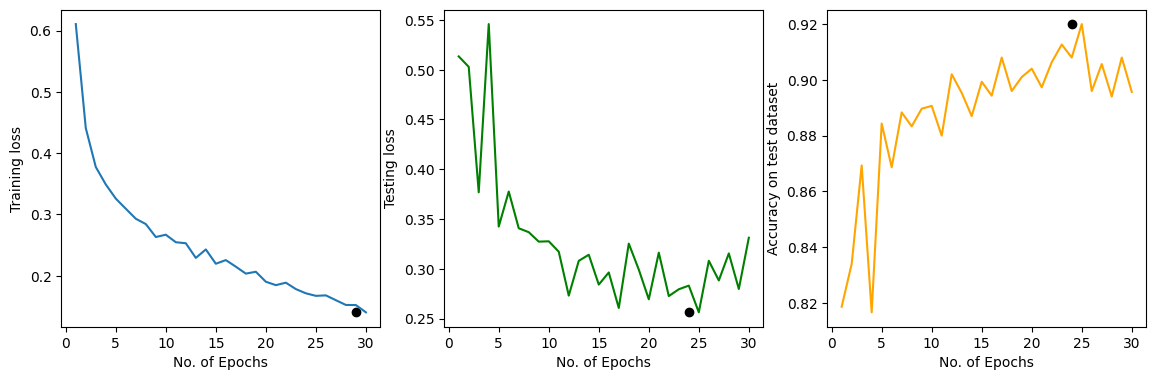

In [15]:
plt.figure(1,figsize=(14,14))
plt.subplot(331)
plt.xlabel('No. of Epochs')
plt.ylabel('Training loss')
plt.plot(list(range(1,31)),training_loss)
plt.scatter(training_loss.index(min(training_loss)),min(training_loss),color = 'black')
plt.subplot(332)
plt.xlabel('No. of Epochs')
plt.ylabel('Testing loss')
plt.plot(list(range(1,31)),testing_loss,color = 'green')
plt.scatter(testing_loss.index(min(testing_loss)),min(testing_loss),color = 'black')
plt.subplot(333)
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy on test dataset')
plt.plot(list(range(1,31)),accuracy_list,color = 'orange')
plt.scatter(accuracy_list.index(max(accuracy_list)),max(accuracy_list),color = 'black')

In [17]:
torch.save(model,'./iter_24.pth')

In [16]:
accuracy_list.index(max(accuracy_list))

24

In [18]:
training_loss[24]

0.167069984114179

In [19]:
testing_loss[24]

0.2563495794204452

In [ ]:
accuracy_list[24]

In [17]:
import os
os.listdir()

['.config', 'iter_24.pth', 'data', 'drive', 'sample_data']

#### Use Iter_41.pth

In [29]:
model = torch.load('iter_24.pth', map_location=torch.device('cpu'))

In [30]:
from PIL import Image

### Predict function, takes input as image name and model name.
usage example: predict(iter_1.pth,'data/img.jpeg')

In [31]:
classes = ['buildings', 'forest', 'glacier', 'mountain','sea','street']
def predict(model, test_image_name):

    transform = test_transform

    test_image = Image.open(test_image_name)
    plt.imshow(test_image)

    test_image_tensor = transform(test_image)
#     print(test_image_tensor.size())

    if torch.cuda.is_available():
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224).cuda()
    else:
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224)

    with torch.no_grad():
        model.eval()
        # Model outputs log probabilities
        out = model(test_image_tensor)
        _ , b = (torch.max(out,1))
#         print(out)
#         print(train_data_loader.dataset.classes[b.item()])
        ps = torch.exp(out)
        topk, topclass = ps.topk(1, dim=1)
#     print(ps)
#     print(topk,topclass)
    return classes[b.item()], topk.cpu().numpy()[0][0]

### Testing

('mountain', 0.9858208)

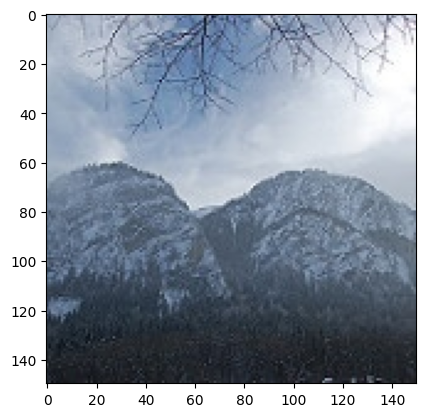

In [34]:
predict(model,'/content/data/seg_pred/seg_pred/10013.jpg')

('buildings', 1.0)

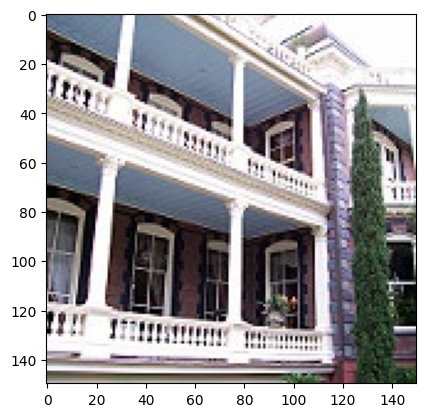

In [35]:
predict(model,'/content/data/seg_pred/seg_pred/13148.jpg')

('College_ID', 0.6084867)

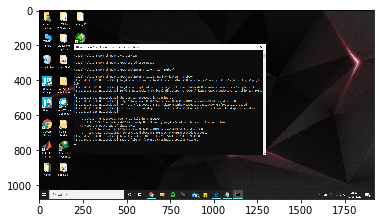

In [ ]:
predict(model,'./Untitled.png')

('College_ID', 1.0)

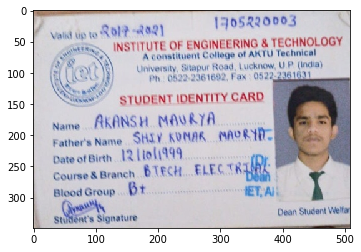

In [ ]:
predict(model,'./pred.jpeg')

('Other', 0.8617144)

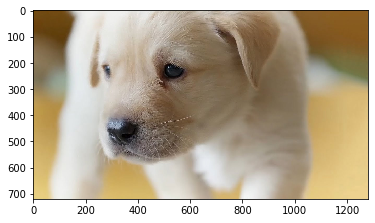

In [ ]:
predict(model,'./maxresdefault.jpg')

('Other', 0.9677061)

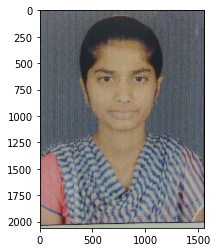

In [ ]:
predict(model,'./Priyanka_59.jpg')

('College_ID', 0.9985619)

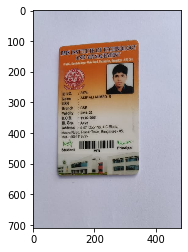

In [ ]:
predict(model,'./Asif Ali_59.jpg')

('Other', 0.99811727)

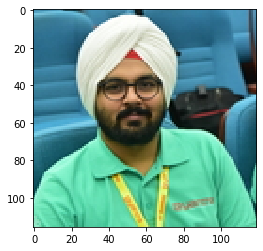

In [ ]:
predict(model,'./Andrea Furtado.jpeg')

('Pan_card', 0.9672918)

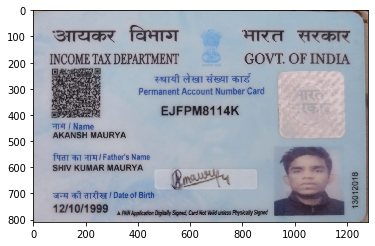

In [ ]:
predict(model,'./WhatsApp Image 2020-05-17 at 2.15.20 PM.jpeg')

('Other', 0.7817769)

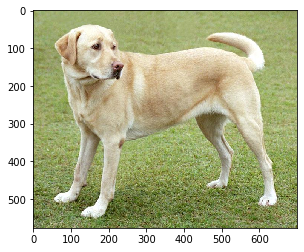

In [ ]:
predict(model,'./dog.jpg')

('Other', 0.9999747)

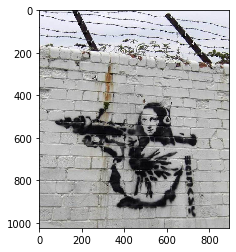

In [ ]:
predict(model,'./2af1b5df0938aa7f.jpg')

('Other', 1.0)

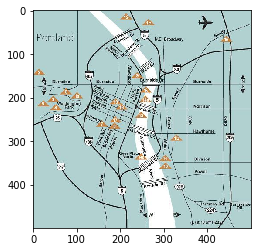

In [ ]:
predict(model,'./image_0282.jpg')

('Other', 0.84907305)

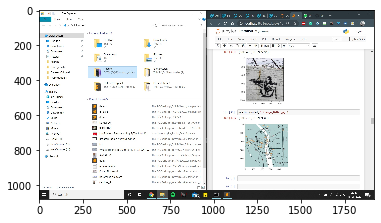

In [ ]:
predict(model,'./Untitled.jpg')

('College_ID', 0.5384868)

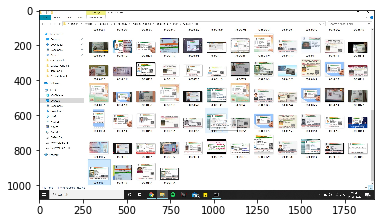

In [ ]:
predict(model,'./trss.jpg')

('Other', 0.9975773)

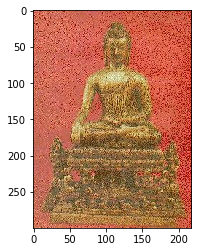

In [ ]:
predict(model,'./image_0027.jpg')

('Other', 0.9990511)

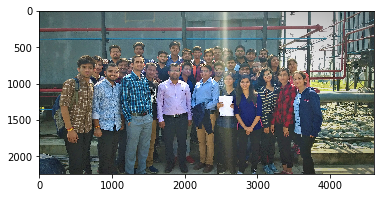

In [ ]:
predict(model,'./20190225_132207.jpeg')

('Adhaar_Card', 0.81186163)

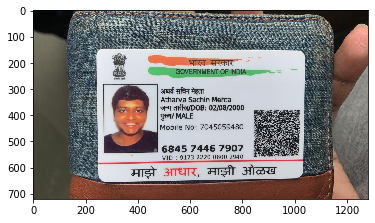

In [ ]:
predict(model,'./Atharva_60.jpeg')

### Wrongly classified as ID card

In [ ]:
import os

In [ ]:
wrong_test_NON_ID = []
for i in os.listdir('./try/'+'NON_ID/'):
    try:
        a = predict(model,'./try/'+'NON_ID/'+ i)
        if a[0] == 'College_ID':
            wrong_test_NON_ID.append(i)

    except:
        pass

In [ ]:
wrong_test_NON_ID

['images38 (6).jpg', 'images64 (5).jpg']

In [ ]:
img0 = Image.open('./try/'+'NON_ID/'+wrong_test_NON_ID[0])
img1 = Image.open('./try/'+'NON_ID/'+wrong_test_NON_ID[1])
# img2 = Image.open(test_dir+'NON_ID/'+wrong_test_NON_ID[2])
# img3 = Image.open(test_dir+'NON_ID/'+wrong_test_NON_ID[3])
# img4 = Image.open(test_dir+'NON_ID/'+wrong_test_NON_ID[4])

### These Images are wrongly classified as ID cards

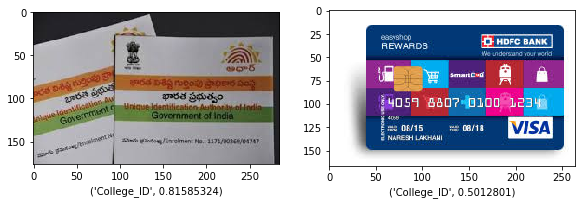

In [ ]:
plt.figure(1,figsize=(15,15))
plt.subplot(331)
plt.xlabel(predict(model,'./try/'+'NON_ID/'+wrong_test_NON_ID[0]))
plt.imshow(img0)
plt.subplot(332)
plt.xlabel(predict(model,'./try/'+'NON_ID/'+wrong_test_NON_ID[1]))
plt.imshow(img1)
# plt.subplot(333)
# plt.xlabel(predict(model,test_dir+'NON_ID/'+wrong_test_NON_ID[2]))
# plt.imshow(img2)
# plt.subplot(334)
# plt.xlabel(predict(model,test_dir+'NON_ID/'+wrong_test_NON_ID[3]))
# plt.imshow(img3)
# plt.subplot(335)
# plt.xlabel(predict(model,test_dir+'NON_ID/'+wrong_test_NON_ID[4]))
# plt.imshow(img4)

# plt.show()


In [ ]:
wrong_test_ID = []
for i in os.listdir('./try/'+'ID/'):
    try:
        a = predict(model,'./try/'+'ID/'+ i)
        if a[0] != 'College_ID':
            wrong_test_ID.append(i)

    except:
        pass

C:\Users\Akansh Maurya\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:804: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
wrong_test_ID

['Soujanya_27.jpg', 'Srinath_89.jpeg', 'Supriya_4.jpg', 'YELISETTY_49.jpg']

In [ ]:
img0 = Image.open('./try/'+'ID/'+wrong_test_ID[0])
img1 = Image.open('./try/'+'ID/'+wrong_test_ID[1])
img2 = Image.open('./try/'+'ID/'+wrong_test_ID[2])
img3 = Image.open('./try/'+'ID/'+wrong_test_ID[3])

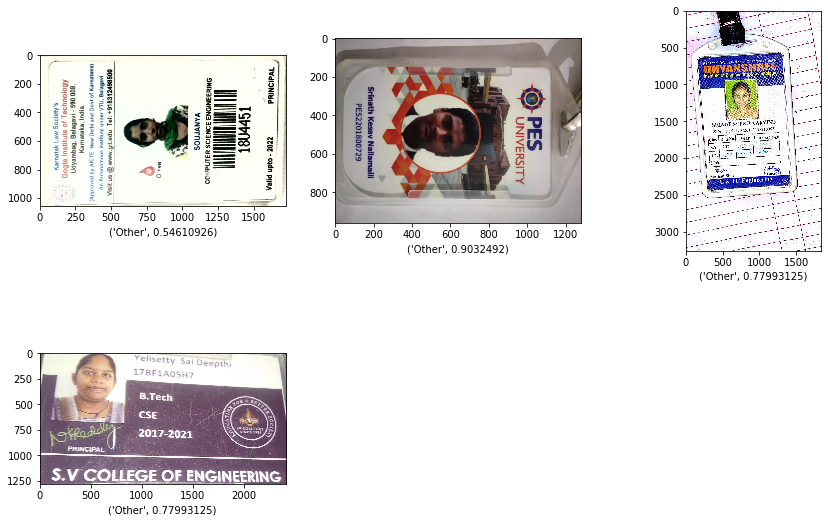

In [ ]:
plt.figure(1,figsize=(15,15))
plt.subplot(331)
plt.xlabel(predict(model,'./try/'+'ID/'+wrong_test_ID[0]))
plt.imshow(img0)
plt.subplot(332)
plt.xlabel(predict(model,'./try/'+'ID/'+wrong_test_ID[1]))
plt.imshow(img1)
plt.subplot(333)
plt.xlabel(predict(model,'./try/'+'ID/'+wrong_test_ID[2]))
plt.imshow(img2)
plt.subplot(334)
plt.xlabel(predict(model,'./try/'+'ID/'+wrong_test_ID[2]))
plt.imshow(img3)

('College_ID', 0.99961054)

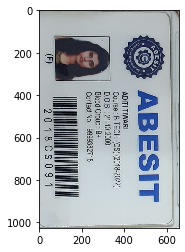

In [ ]:
predict(model,'./Aditi_34.jpg')

('College_ID', 0.9690974)

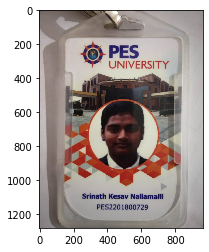

In [ ]:
predict(model,'./Srinath_89.jpeg')

In [ ]:
wrong_test_ID = []
for i in os.listdir('./try/'+'ID/'):
    try:
        a = predict(model,'./try/'+'ID/'+ i)
        if a[0] != 'College_ID':
            wrong_test_ID.append(i)

    except:
        pass

In [ ]:
wrong_train_adhaar = []
for i in os.listdir(train_dir+'Adhaar_Card/'):
    try:
        a = predict(model,train_dir+'Adhaar_Card/'+ i)
        if a[0] == 'College_ID':
            wrong_train_adhaar.append(i)

    except:
        pass

In [ ]:
wrong_train_adhaar

['00000000.jpg']

In [ ]:
wrong_train_ID = []
for i in os.listdir(train_dir+'College_ID/'):
    try:
        a = predict(model,train_dir+'College_ID/'+ i)
        if a[0] != 'College_ID':
            wrong_test_ID.append(i)

    except:
        pass

C:\Users\Akansh Maurya\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:804: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
C:\Users\Akansh Maurya\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:804: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


In [ ]:
wrong_train_ID

[]

In [ ]:
wrong_train_pancard = []
for i in os.listdir(train_dir+'Pan_Card/'):
    try:
        a = predict(model,train_dir+'Pan_Card/'+ i)
        if a[0] == 'College_ID':
            wrong_train_pancard.append(i)

    except:
        pass

In [ ]:
wrong_train_pancard

[]

In [ ]:
wrong_train_Other = []
for i in os.listdir(train_dir+'Other/'):
    try:
        a = predict(model,train_dir+'Other/'+ i)
        if a[0] == 'College_ID':
            wrong_train_Other.append(i)

    except:
        pass

In [ ]:
wrong_train_Other

['Atharva_60.jpeg',
 'image28.jpeg',
 'image_0177.jpg',
 'image_0338.jpg',
 'image_0399.jpg',
 'image_0402.jpg',
 'image_0409.jpg',
 'image_0460.jpg',
 'Kanchanapalli_10.jpg',
 'SANTHWANA_33.png']

### Drawing Inference

### Class activation mapping

In [ ]:
from PIL import Image
from gradcam.utils import visualize_cam, Normalize
from gradcam import GradCAM, GradCAMpp
# model = torch.load('iter_3.pth')

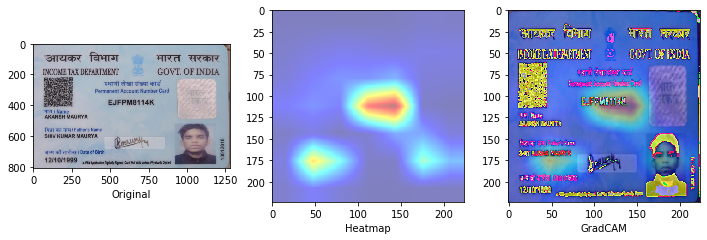

In [ ]:
pil_img = Image.open("./WhatsApp Image 2020-05-17 at 2.15.20 PM.jpeg")
normed_torch_img = test_transform(pil_img).unsqueeze(0).cuda()
resnet = model
resnet.eval()
resnet.cuda()
gradcam = GradCAMpp.from_config(model_type='resnet',
                              arch=resnet, layer_name='layer4')
mask, logit = gradcam(normed_torch_img, class_idx=1)
heatmap, cam_result = visualize_cam(mask, normed_torch_img)
a = transforms.ToPILImage()

heatmap, cam_result = visualize_cam(mask, normed_torch_img)

a = transforms.ToPILImage()

img1 = a(heatmap)
img2 = a(cam_result)
plt.figure(1,figsize=(12,12))
plt.subplot(331)
plt.xlabel('Original')
plt.imshow(pil_img)
plt.subplot(332)
plt.xlabel('Heatmap')
plt.imshow(img1,cmap='jet', alpha = 0.5)
plt.subplot(333)
plt.xlabel('GradCAM')
plt.imshow(img2,cmap='jet')
# print(predict(model,'./adhw.png'))

C:\Users\Akansh Maurya\anaconda3\lib\site-packages\torch\nn\functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


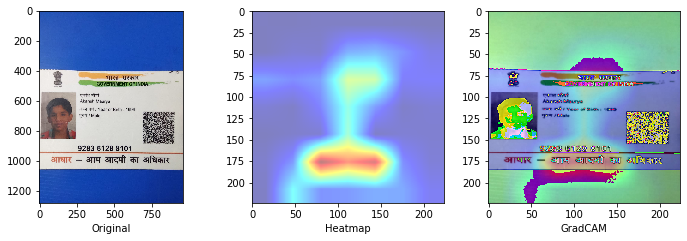

In [ ]:
pil_img = Image.open("./WhatsApp Image 2020-03-23 at 8.35.57 PM.jpeg")
normed_torch_img = test_transform(pil_img).unsqueeze(0).cuda()
resnet = model
resnet.eval()
resnet.cuda()
gradcam = GradCAMpp.from_config(model_type='resnet',
                              arch=resnet, layer_name='layer4')
mask, logit = gradcam(normed_torch_img, class_idx=1)
heatmap, cam_result = visualize_cam(mask, normed_torch_img)
a = transforms.ToPILImage()

heatmap, cam_result = visualize_cam(mask, normed_torch_img)

a = transforms.ToPILImage()

img1 = a(heatmap)
img2 = a(cam_result)
plt.figure(1,figsize=(12,12))
plt.subplot(331)
plt.xlabel('Original')
plt.imshow(pil_img)
plt.subplot(332)
plt.xlabel('Heatmap')
plt.imshow(img1,cmap='jet', alpha = 0.5)
plt.subplot(333)
plt.xlabel('GradCAM')
plt.imshow(img2,cmap='jet')



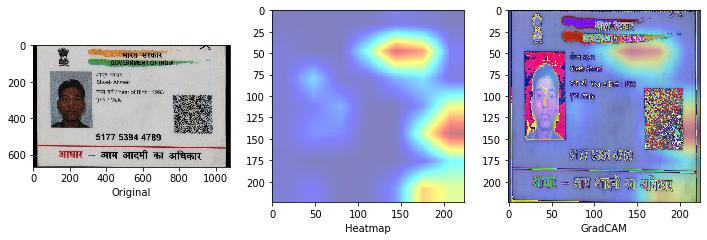

In [ ]:
pil_img = Image.open("./adhtest.jpg")
normed_torch_img = test_transform(pil_img).unsqueeze(0).cuda()
resnet = model
resnet.eval()
resnet.cuda()
gradcam = GradCAMpp.from_config(model_type='resnet',
                              arch=resnet, layer_name='layer4')
mask, logit = gradcam(normed_torch_img, class_idx=1)
heatmap, cam_result = visualize_cam(mask, normed_torch_img)
a = transforms.ToPILImage()

heatmap, cam_result = visualize_cam(mask, normed_torch_img)

a = transforms.ToPILImage()

img1 = a(heatmap)
img2 = a(cam_result)
plt.figure(1,figsize=(12,12))
plt.subplot(331)
plt.xlabel('Original')
plt.imshow(pil_img)
plt.subplot(332)
plt.xlabel('Heatmap')
plt.imshow(img1,cmap='jet', alpha = 0.5)
plt.subplot(333)
plt.xlabel('GradCAM')
plt.imshow(img2,cmap='jet')



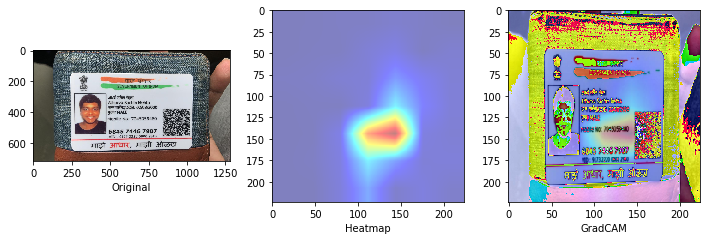

In [ ]:
pil_img = Image.open("./Atharva_60.jpeg")
normed_torch_img = test_transform(pil_img).unsqueeze(0).cuda()
resnet = model
resnet.eval()
resnet.cuda()
gradcam = GradCAMpp.from_config(model_type='resnet',
                              arch=resnet, layer_name='layer4')
mask, logit = gradcam(normed_torch_img, class_idx=1)
heatmap, cam_result = visualize_cam(mask, normed_torch_img)
a = transforms.ToPILImage()

heatmap, cam_result = visualize_cam(mask, normed_torch_img)

a = transforms.ToPILImage()

img1 = a(heatmap)
img2 = a(cam_result)
plt.figure(1,figsize=(12,12))
plt.subplot(331)
plt.xlabel('Original')
plt.imshow(pil_img)
plt.subplot(332)
plt.xlabel('Heatmap')
plt.imshow(img1,cmap='jet', alpha = 0.5)
plt.subplot(333)
plt.xlabel('GradCAM')
plt.imshow(img2,cmap='jet')



Text(0.5, 0, 'Predicted Class : College_ID')

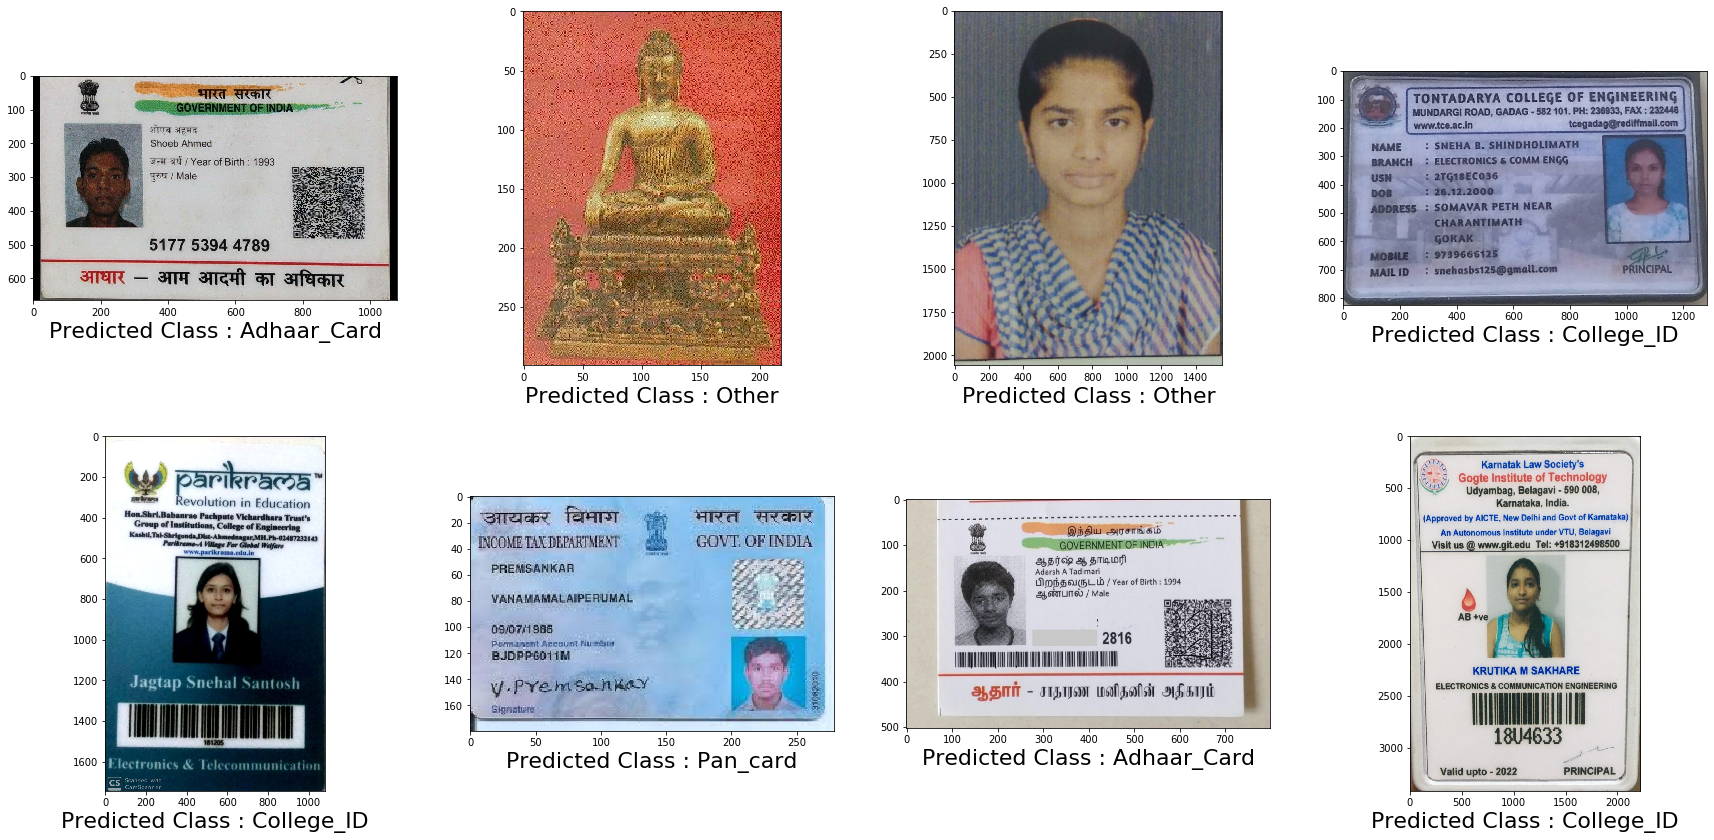

In [ ]:
plt.figure(figsize=(30,30))
plt.subplot(441)
a, b = predict(model,'./Paper/adhtest.jpg')
plt.xlabel('Predicted Class : '+ a, fontsize=22)
plt.subplot(442)
a, b = predict(model,'./Paper/image_0027.jpg')
plt.xlabel('Predicted Class : '+ a, fontsize=22)
plt.subplot(443)
a, b = predict(model,'./Paper/Priyanka_59.jpg')
plt.xlabel('Predicted Class : '+ a, fontsize=22)
plt.subplot(444)
a, b = predict(model,'./Paper/Sneha_13.jpg')
plt.xlabel('Predicted Class : '+ a, fontsize=22)
plt.subplot(445)
a, b = predict(model,'./Paper/Snehal_35.jpg')
plt.xlabel('Predicted Class : '+ a, fontsize=22)
plt.subplot(446)
a, b = predict(model,'./Paper/image10 (2).jpeg')
plt.xlabel('Predicted Class : '+ a, fontsize=22)
plt.subplot(447)
a, b = predict(model,'./Paper/adhw.png')
plt.xlabel('Predicted Class : '+ a, fontsize=22)
plt.subplot(448)
a, b = predict(model,'./Paper/Krutika_15.jpg')
plt.xlabel('Predicted Class : '+ a, fontsize=22)

In [ ]:
wrong_test_ID = []
for i in os.listdir('./Rotate_check/'+'Rotated/'):
    try:
        a = predict(model,'./Rotate_check/'+'Rotated/'+ i)
        if a[0] != 'College_ID':
            wrong_test_ID.append(i)

    except:
        pass

In [ ]:
wrong_test_ID

['Abhinav_82.jpg_90.jpg',
 'Aditi_34.jpg_180.jpg',
 'AKASH PRADEEP_38.jpg_90.jpg',
 'Bharatrh Simha_7.png_180.jpg',
 'BHOOMIKA_39.jpg_180.jpg',
 'Chinmay_67.jpeg_180.jpg',
 'D Jasmine_49.jpg_180.jpg',
 'Dhamini_79.jpg_180.jpg',
 'Dhanshri_11.jpg_180.jpg',
 'Dokku Saiteja_73.jpg_180.jpg',
 'KOMATI_24.jpg_90.jpg',
 'Lepakshi_12.jpg_180.jpg',
 'Maithili_4.jpg_90.jpg',
 'Mandar_43.jpg_180.jpg',
 'Shobha_68.jpg_270.jpg',
 'Shreenidhi_98.jpg_270.jpg',
 'Sonakshi_81.jpg_270.jpg',
 'Vyankatesh_61.jpg_270.jpg',
 'V_18.jpg_270.jpg',
 'Yash_68.jpeg_270.jpg']

### Roation Problem on ID cards
When ID cards are in right orientation they are classified correctly, see examples

Text(0.5, 0, 'Predicted Class : College_ID')

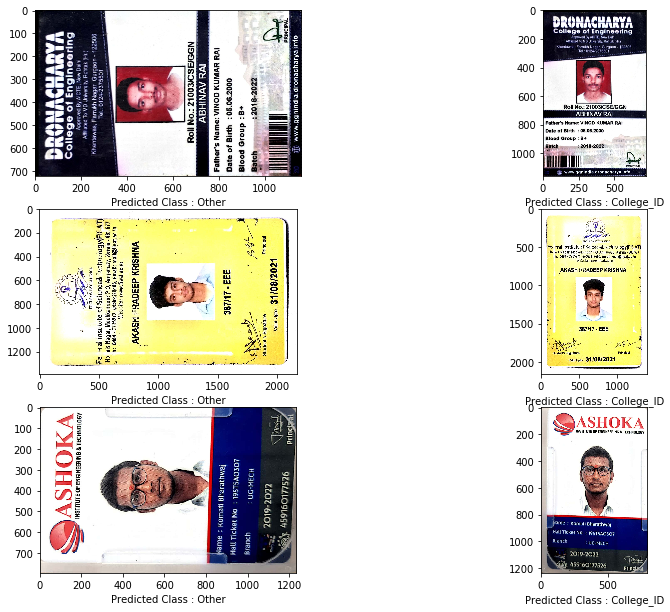

In [ ]:
plt.figure(figsize=(14,14))
plt.subplot(421)
a, b = predict(model,'./Rotate_check/Rotated/Abhinav_82.jpg_90.jpg')
plt.xlabel('Predicted Class : '+ a)
plt.subplot(422)
a, b = predict(model,'./Abhinav_82.jpg')
plt.xlabel('Predicted Class : '+ a)
plt.subplot(423)
a, b = predict(model,'./Rotate_check/Rotated/AKASH PRADEEP_38.jpg_90.jpg')
plt.xlabel('Predicted Class : '+ a)
plt.subplot(424)
a, b = predict(model,'./AKASH PRADEEP_38.jpg')
plt.xlabel('Predicted Class : '+ a)
plt.subplot(425)
a, b = predict(model,'./Rotate_check/Rotated/KOMATI_24.jpg_90.jpg')
plt.xlabel('Predicted Class : '+ a)
plt.subplot(426)
a, b = predict(model,'./KOMATI_24.jpg')
plt.xlabel('Predicted Class : '+ a)